<div class="alert alert-block alert-info"><b>IAB303</b> - Data Analytics for Business Insight</div>

# Module 8 -  Forecasting

In this module we focus on predicting future trends in other words, we will learn techniques for Forecasting. Forecasting is the process of making predictions of the future based on past and present data and most commonly by analysis of trends. Forecasting is one of the most important tools in data analytics, because by identifying future trends, one can make appropriate decisions and take market advantage.

### Kinds of Analytics

* **Descriptive analytics**
    - Interpretation of historical data to better understand changes that have happened in a business. 
    - Describes the past using a range of data to draw comparisons
    - Usually consists in reports such as year-over-year pricing changes, month-over-month sales growth, the number of users, or the total revenues
    - Performance metrics can be used to flag areas of **strength** and **weakness** in order to inform management’s strategy.
    
    
    
    

* **Predictive analytics**
    - Used to make **predictions** about unknown future events.
    - Describes the use of statistics and modeling to determine **future performance** based on current and historical data.
    - Looks at **patterns** in data to determine if those patterns are likely to emerge again, which allows businesses and investors to **adjust** where they use their **resources** in order to take **advantage** of possible future events.
    - Example:  marketers look at how consumers have reacted to the overall economy when planning on a new campaign, and can use shifts in demographics to determine if the current mix of products will attract consumers to make a purchase.
   

* **Prescriptive analytics**
  - Uses technology to help businesses make better decisions about how to handle specific situations by factoring in knowledge of possible situations, available resources, past performance and what is currently happening. 
  - Uses statistics and modeling to determine future performance based on current and historical data — to improve business decisions despite uncertainty and changing conditions, and to help companies determine what action to take.
  - Can help prevent fraud, limit risk, increase efficiency, meet business goals and create more loyal customers. 

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/Three_Phases_of_Analytics.png" />
  

### Predictive Anaytics: Forecasting

Forecasting is the process of making predictions of the future based on past and present data and most commonly by analysis of trends

<img src="https://i2.cdn.turner.com/money/2012/01/02/markets/stock_market_outlook_survey/chart-sp500-stock-outlook.top.gif" />

* The more recorded past data there is, the more accurate the forecast model is. Although, it is always hard to forecast unexpected events.
* New companies, using guesswork when they use sales forecasting strategies, because they do not hold enough data

**Strengths**
*  Forces a company to think about how it intends to monitor and track sales beyond the current period
* Adjust the business strategy based on its prediction for sales growth
* If a seasonal pattern in sales is noticed, one can hire or reduce staff accordingly
* Track sales per item and use this information to focus stronger selling products and services.

**Weaknesses**
* Limited data mitigates the effectiveness of putting together a sales forecast.
* Past sales results are not always indicative of future sales results (very important)!
* Sales forecasting uses some form of projection about future demand interpreted through consumer preferences, opinions and attitudes.
* Consumer demand is a moving target, which makes hard future projections

### Things to take into consideration in Forecasting:

* Seasons (Winter, Summer, Autumn, Spring, Easter, Holidays, Christmas, etc)
* Unpredictable Revenue
* Revenue based on sales forecasts is only moderately predictable.
* The longer that we try to forecast, the higher the errors (always go for short term forecasting)

### A General Framework for Forecasting

<img src="images/forecast.png" />

#### Analyse Data

In [1]:
# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from datetime import datetime 

# Forecasting libraries
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [154]:
# load dataset
file = 'data/sales_small.csv'
data = pd.read_csv( file )
data

,Unnamed: 0,date,store,item,sales
0,7304,2013-01-01,5,1,11
1,7305,2013-01-02,5,1,9
2,7306,2013-01-03,5,1,12
3,7307,2013-01-04,5,1,8
4,7308,2013-01-05,5,1,13
...,...,...,...,...,...
91295,903865,2017-12-27,5,50,35
91296,903866,2017-12-28,5,50,39
91297,903867,2017-12-29,5,50,37
91298,903868,2017-12-30,5,50,60


In [7]:
data_sample = data[ data.store == 5 ]
data_sample.to_csv("data_small.csv")

In [8]:
# get the time period of this dataset
max_period = data['date'].max()
min_period = data['date'].min()

print( 'This dataset has been collecte from ' + str(min_period) + ' to ' + str(max_period)  )

This dataset has been collecte from 2013-01-01 to 2017-12-31


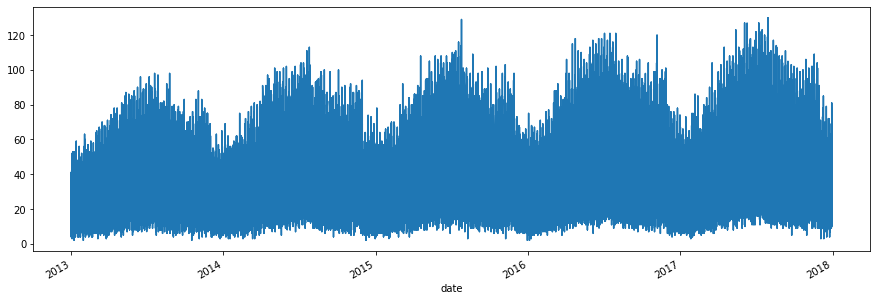

In [9]:
# Check sales throughout time

# index data by date
data['date'] = pd.to_datetime(data.date,format='%Y-%m-%d')
data.index = data['date']

# plot sales
data['sales'].plot( figsize=(15, 5) )


The sales plot seems to indicate a pattern: it reaches its peak in the middle of the year (summer) and its minimum in the end of the year (December). Can you imagine an item that displays such behaviour?

Also, we see that our sales graph seems to be like a signal composed of three elements: the actual sales behaviour, the seasonal trends and some noise (data that does not fit in the patterns of the sales neither in seasonal trends).

We can decompose this signal by using Python's *seasonal_decompose* function

<Figure size 1080x360 with 0 Axes>

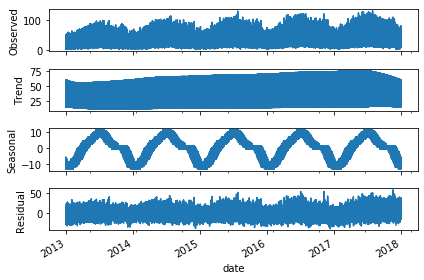

In [10]:
# check the general trends and sesonality of the sales
plt.figure(figsize=(15,5))

decomposed_sales = sm.tsa.seasonal_decompose(data['sales'], freq=365)
ax = decomposed_sales.plot(  )
 

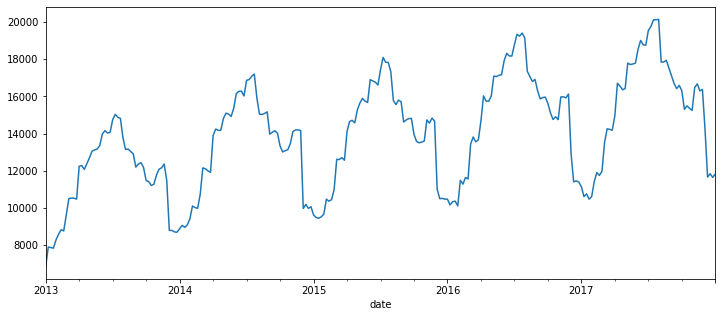

In [46]:
ax = plt.figure( figsize=(12, 5) )

# the resample function is a convenience method for frequency conversion of data
# basically we are converting our daily item sales into a weekly frequency
# this makes the data more clear for analysis
week_sales = data.sales.resample('W').sum()
ax = week_sales.plot(ax=axes[0])
week_sales.plot()



To help us identify product trends and seasonal changes, Python has a very good statistics library that can assist us on that, more precisely the function seasonal_decompose.

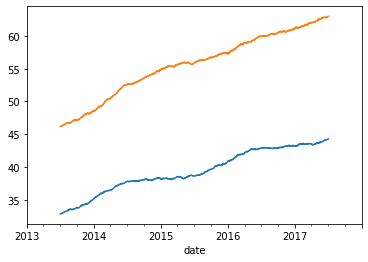

In [139]:
PRODUCT = 48
sales_1 = data[['date', 'sales']].loc[ data['item'] == PRODUCT]

PRODUCT = 10
sales_2 = data[['date', 'sales']].loc[ data['item'] == PRODUCT]

# Apply the seasonal decomposition method to the sales dataset for a yearly frequency
decomposed_sales_1 = sm.tsa.seasonal_decompose(sales_1['sales'], freq=365)
decomposed_sales_2 = sm.tsa.seasonal_decompose(sales_2['sales'], freq=365)

decomposed_sales_1.trend.plot()
decomposed_sales_2.trend.plot()

By anaysing past data, we can make some descriptive anaytics about the sales. We see that there is a general trend for the sales to increase, but there are lots of fluctuations due to seasons and also some considerable amount of noise

#### Separate Data into Training set and Test set

We are going to forecast our data using our daily sales dataset. The first thing that it is important to know is the size of this datastet. Since this is a forecast approach, we will use the majority of our data to train our model and we will reserve the last 3 months to test it.

In [197]:
# for simplicity, let's make the forecast for only one year
YEAR = 2015
ITEM = 10

data.reset_index(drop=True, inplace=True)

mask = (data['date'] > '2015-01-01' )
data_sample = data[ mask ]
data_sample = data_sample[ data.item == ITEM ]

# 1. SEPARATE OUR DATASET:
total_sales = len(data_sample)

# we will split our data by selecting the last 3 months for prediction and the 
# remaining data for training
data_split = 90 # 90 days corresponds to the three months

# Allocate the data for training
train = data_sample.iloc[0: total_sales - data_split - 1]
test = data_sample.iloc[total_sales - data_split : ]

# Put the remaining data of our dataset for testing
expected = data_sample.iloc[total_sales - data_split:]

print('Total datapoints in the dataset: ' + str( total_sales )) 
print('Datapoints reserved for training: ' + str(len(train)))
print('Datapoints reserved for testing: ' + str(len(expected)))

Total datapoints in the dataset: 1095
Datapoints reserved for training: 1004
Datapoints reserved for testing: 90


In [198]:
# In order to use the learning algorithm, we need to put the dataframe in a specific format:
# column 1: name = 'ds'. This represents the dates
# column 2: name = 'y'. This represents what we want to predict. In this case, the overall sales of the store
train['ds'] = train['date']
train['y'] = train['sales']

train = train.drop(['Unnamed: 0', 'date', 'store', 'item', 'sales'], axis=1)
train.head()

,ds,y
17165,2015-01-02,34
17166,2015-01-03,39
17167,2015-01-04,54
17168,2015-01-05,26
17169,2015-01-06,30


In [199]:
test['ds'] = test['date']
test['y'] = test['sales']

test = test.drop(['Unnamed: 0', 'date', 'store', 'item', 'sales'], axis=1)
test.head()

,ds,y
18170,2017-10-03,55
18171,2017-10-04,50
18172,2017-10-05,64
18173,2017-10-06,51
18174,2017-10-07,69


#### Define the Learning Algorithm

Next, we define the type of learning algorithm that we want to apply. Python's statistical libraries offer us a wide range of learning algorithms that you can explore. We will explore Facebook's Prophet algorithm, which is based on a particular statistical learning method called Linear Regression.

<img src="https://josef-pkt.github.io/pages/slides/images/airpassenger_forecast.png" />


In [200]:
#2. DEFINE THE LEARNING ALGORITHM

# set the uncertainty interval to 95% (the Prophet default is 80%)
model = Prophet(interval_width=0.95)
model


#### Fit data to model
After defining our learning model and pluging in the right learning parameters, we need to fit our data to the model

In [201]:
# FIT THE DATA
model.fit(train)

# You can see the general results of this model including:
# coef: the coeffiecients that were learned to for the data
# std err: the error obtained while fitting the data
# some extra information about statistical evaluation and confidence intervals

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Predict Results (Forecast Data)
Let's use SARIMAX to try to estimate the last 3 months of our dataset. This way we can see how well SARIMAX performed, since we have the true sales of the store for that time period

In [211]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2017-10-03,60.075058,46.070738,73.962415
1,2017-10-04,60.010773,44.211116,75.266514
2,2017-10-05,63.927089,49.528720,79.308493
3,2017-10-06,67.672976,52.145046,82.714842
4,2017-10-07,70.018051,55.853101,84.823211
...,...,...,...,...
85,2017-12-27,44.689253,29.868153,58.442326
86,2017-12-28,49.107740,34.688386,64.657920
87,2017-12-29,53.336144,39.081968,68.643602
88,2017-12-30,56.138384,39.497098,70.712431


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

- ds: the datestamp of the forecasted value
- yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the - predicted values of a value y)
- yhat_lower: the lower bound of our forecasts
- yhat_upper: the upper bound of our forecasts

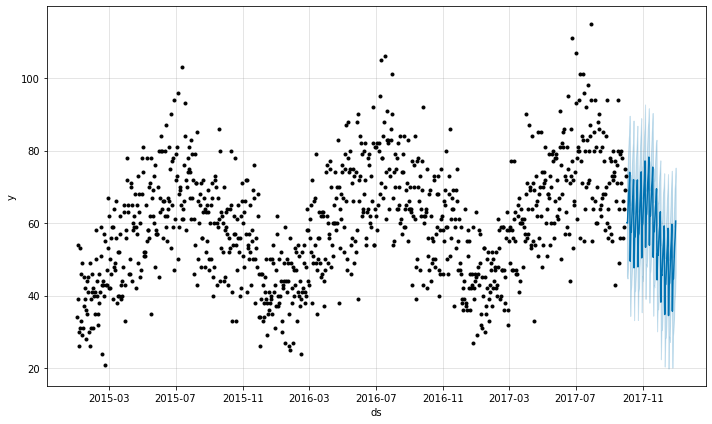

In [203]:
f = model.plot(forecast, uncertainty=True)

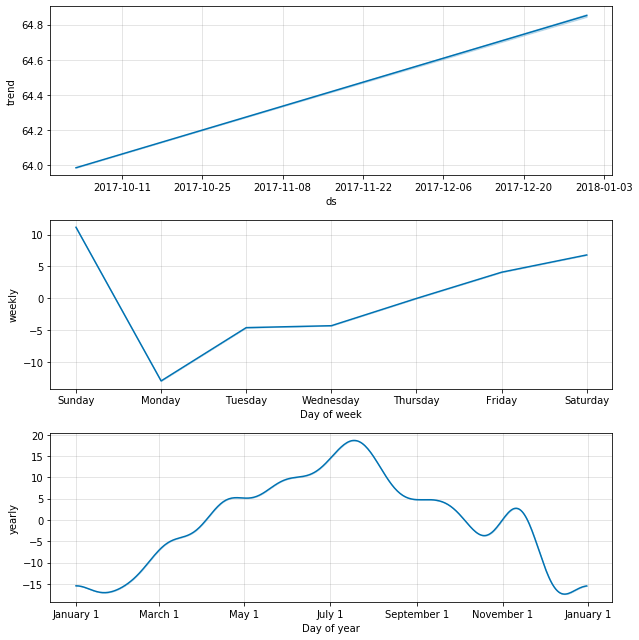

In [204]:
f = model.plot_components(forecast)

The plot above provides interesting insights. The first plot shows that the monthly volume of sales has been linearly increasing over time. The second plot highlights the fact that the weekly sales peaks towards the end of the week and seems to have a decline in the begining of the week, while the third plot shows that the most sales occur during summmer June to August (Summer holidays in the Northern Hemisphere). 

#### Evaluate the Forecast
In order to have a numerical validation of the model, instead of jus a graphical one, we can use an error metric called *Mean Squared Error*

In [236]:
# Compute the error:
test['predicted'] = forecast.yhat.values

error = mean_squared_error( test['y'], test['predicted'])
print('FORECAST model Mean Squares Error: ' + str(error))


FORECAST model Mean Squares Error: 74.25667143455738


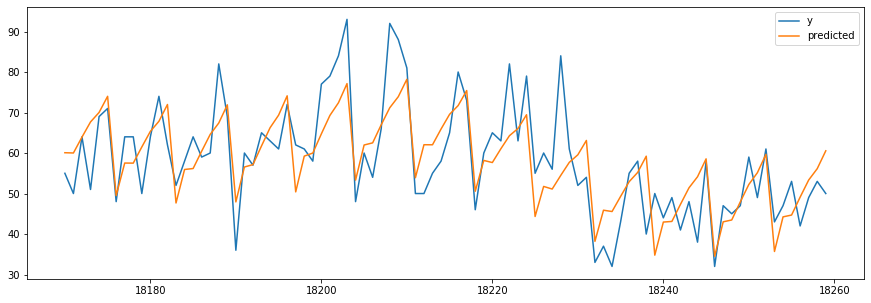

In [237]:

test.plot( figsize=(15,5))